In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn
%matplotlib inline
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors

Note: you may need to restart the kernel to use updated packages.


In [2]:
#loading the dataset
Climate = pd.read_csv('Downloads/dailyclimate.csv/dailyclimate.csv')

In [3]:
Climate #Visualizing the dataset
import warnings
warnings.filterwarnings('ignore')


In [4]:
Climate['Date'] = pd.to_datetime(Climate['Date']) #Changing the Date into Datetime format
Climate.describe()

Unnamed: 0                           Date       Latitude  \
count  883128.000000                         883128  883128.000000   
mean   441563.500000  2000-07-01 12:00:00.000000256      27.959677   
min         0.000000            1981-01-01 00:00:00      26.500000   
25%    220781.750000            1990-10-01 18:00:00      27.300000   
50%    441563.500000            2000-07-01 12:00:00      27.950000   
75%    662345.250000            2010-04-01 06:00:00      28.500000   
max    883127.000000            2019-12-31 00:00:00      30.000000   
std    254937.238603                            NaN       0.883261   

           Longitude         Precip       Pressure    Humidity_2m  \
count  883128.000000  883128.000000  883128.000000  883128.000000   
mean       84.277419       2.433753      82.896390       8.491043   
min        80.200000       0.000000      54.730000       0.270000   
25%        82.400000       0.000000      77.680000       3.910000   
50%        84.300000       0.050000      83.720000       6.750000   
75%        85.900000       1.870000      92.740000      13.170000   
max        87.900000     177.790000     100.340000      23.270000   
std         2.181331       6.160721      10.707984       5.426636   

               RH_2m        Temp_2m  WetBulbTemp_2m  ...   TempRange_2m  \
count  883128.000000  883128.000000   883128.000000  ...  883128.000000   
mean       55.657950      15.815832        5.428265  ...      10.795352   
min         4.040000     -25.440000      -28.190000  ...       1.310000   
25%        36.540000      10.070000       -2.740000  ...       8.250000   
50%        54.320000      16.730000        4.980000  ...      10.920000   
75%        77.160000      22.500000       14.780000  ...      13.210000   
max       100.000000      38.610000       27.150000  ...      25.520000   
std        22.877576       9.172463       10.850204  ...       3.306661   

       EarthSkinTemp  WindSpeed_10m  MaxWindSpeed_10m  MinWindSpeed_10m  \
count  883128.000000  883128.000000     883128.000000     883128.000000   
mean       15.539531       2.372512          4.673551          0.666903   
min       -33.160000       0.470000          0.970000          0.000000   
25%         9.160000       1.900000          3.730000          0.310000   
50%        16.530000       2.260000          4.520000          0.530000   
75%        22.880000       2.710000          5.450000          0.870000   
max        41.510000      13.570000         20.210000          8.360000   
std         9.924091       0.685488          1.355903          0.510857   

       WindSpeedRange_10m  WindSpeed_50m  MaxWindSpeed_50m  MinWindSpeed_50m  \
count       883128.000000  883128.000000     883128.000000     883128.000000   
mean             4.006641       2.730587          4.643453          0.924084   
min              0.450000       0.650000          1.120000          0.000000   
25%              3.070000       2.070000          3.610000          0.400000   
50%              3.910000       2.510000          4.340000          0.680000   
75%              4.840000       3.100000          5.310000          1.170000   
max             16.580000      15.710000         22.850000         10.940000   
std              1.300380       1.001095          1.509792          0.806458   

       WindSpeedRange_50m  
count       883128.000000  
mean             3.719365  
min              0.450000  
25%              2.830000  
50%              3.520000  
75%              4.390000  
max             18.500000  
std              1.282227  

[8 rows x 22 columns]

In [5]:
print(Climate.columns) #Name of Columns

Index(['Unnamed: 0', 'Date', 'District', 'Latitude', 'Longitude', 'Precip',
       'Pressure', 'Humidity_2m', 'RH_2m', 'Temp_2m', 'WetBulbTemp_2m',
       'MaxTemp_2m', 'MinTemp_2m', 'TempRange_2m', 'EarthSkinTemp',
       'WindSpeed_10m', 'MaxWindSpeed_10m', 'MinWindSpeed_10m',
       'WindSpeedRange_10m', 'WindSpeed_50m', 'MaxWindSpeed_50m',
       'MinWindSpeed_50m', 'WindSpeedRange_50m'],
      dtype='object')


In [6]:
#since the data size is too large, we reduce the dimensions and take 10 wettest districts from Nepal
top_districts = Climate.groupby('District')['Precip'].mean().nlargest(10).index
Wettest_districts= Climate[Climate['District'].isin(top_districts)]


In [7]:
Wettest_districts.describe()


Unnamed: 0                           Date       Latitude  \
count  142440.000000                         142440  142440.000000   
mean   450109.900000  2000-07-01 12:00:00.000000256      27.700000   
min         0.000000            1981-01-01 00:00:00      26.700000   
25%    292001.750000            1990-10-01 18:00:00      27.500000   
50%    448685.500000            2000-07-01 12:00:00      27.900000   
75%    690833.250000            2010-04-01 06:00:00      28.000000   
max    826151.000000            2019-12-31 00:00:00      28.400000   
std    250862.483923                            NaN       0.509904   

           Longitude         Precip       Pressure    Humidity_2m  \
count  142440.000000  142440.000000  142440.000000  142440.000000   
mean       84.140000       3.057875      89.834658       9.677983   
min        82.100000       0.000000      79.010000       0.880000   
25%        83.200000       0.000000      86.590000       4.600000   
50%        83.450000       0.040000      92.210000       7.770000   
75%        84.000000       2.210000      92.960000      15.490000   
max        87.900000     177.790000      94.500000      22.100000   
std         1.957659       7.829425       4.211321       5.715503   

               RH_2m        Temp_2m  WetBulbTemp_2m  ...   TempRange_2m  \
count  142440.000000  142440.000000   142440.000000  ...  142440.000000   
mean       53.515381      20.481807        9.033097  ...      10.597126   
min         4.370000       0.640000      -16.230000  ...       1.740000   
25%        33.740000      15.740000        0.850000  ...       7.800000   
50%        50.960000      21.300000        8.360000  ...      10.790000   
75%        75.970000      25.240000       18.630000  ...      13.170000   
max        98.400000      35.020000       25.220000  ...      21.670000   
std        23.559935       6.011216        9.694378  ...       3.437841   

       EarthSkinTemp  WindSpeed_10m  MaxWindSpeed_10m  MinWindSpeed_10m  \
count  142440.000000  142440.000000     142440.000000     142440.000000   
mean       19.993249       2.369225          4.316285          0.815402   
min        -3.310000       0.590000          1.200000          0.000000   
25%        14.010000       1.890000          3.410000          0.450000   
50%        21.240000       2.240000          4.100000          0.730000   
75%        25.610000       2.720000          4.990000          1.070000   
max        36.830000       7.780000         13.040000          6.030000   
std         7.189661       0.674281          1.303424          0.489949   

       WindSpeedRange_10m  WindSpeed_50m  MaxWindSpeed_50m  MinWindSpeed_50m  \
count       142440.000000  142440.000000     142440.000000     142440.000000   
mean             3.500856       2.980612          4.646809          1.143887   
min              0.630000       0.900000          1.690000          0.000000   
25%              2.680000       2.300000          3.590000          0.570000   
50%              3.340000       2.780000          4.320000          0.930000   
75%              4.150000       3.420000          5.320000          1.500000   
max             11.370000      10.700000         15.780000          9.070000   
std              1.154614       0.968717          1.526774          0.798398   

       WindSpeedRange_50m  
count       142440.000000  
mean             3.502931  
min              0.450000  
25%              2.610000  
50%              3.270000  
75%              4.130000  
max             13.440000  
std              1.297740  

[8 rows x 22 columns]

Creating a boxplot of different properties aganist precipitation. 

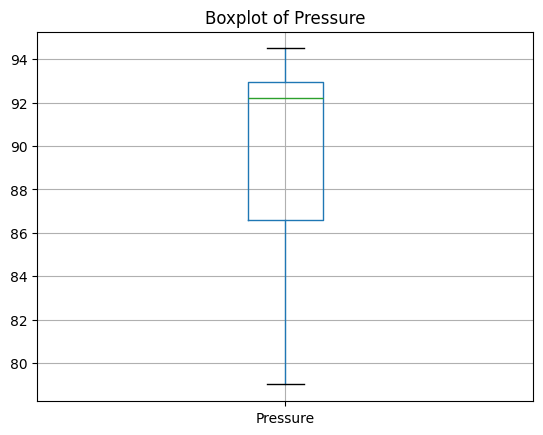

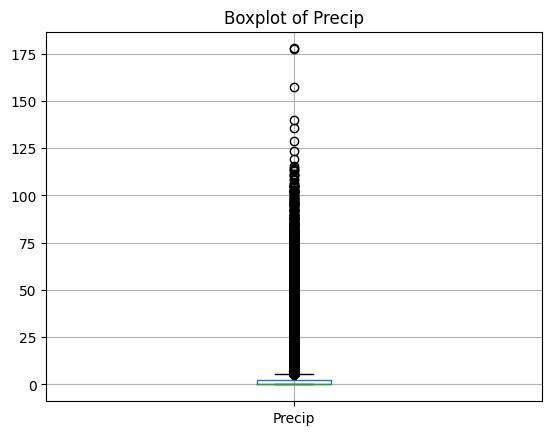

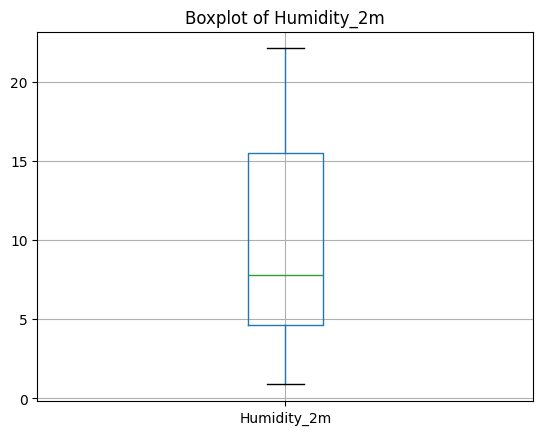

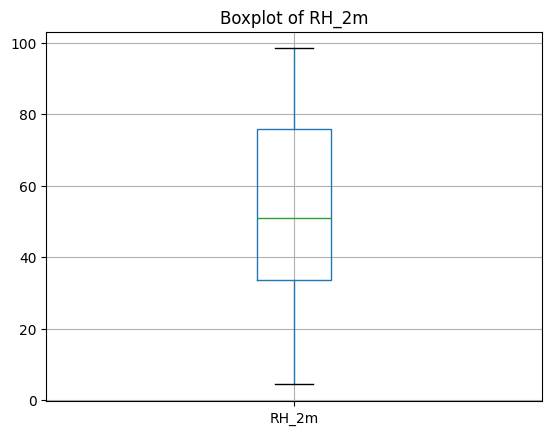

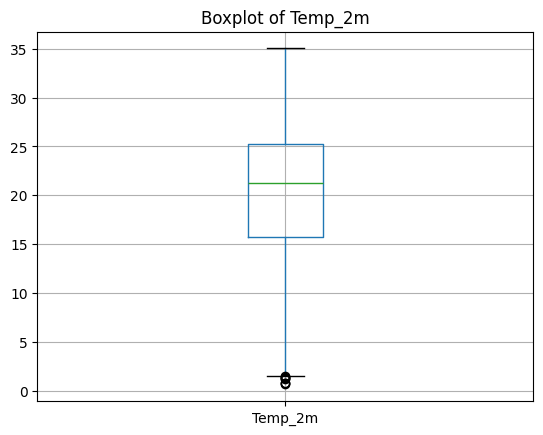

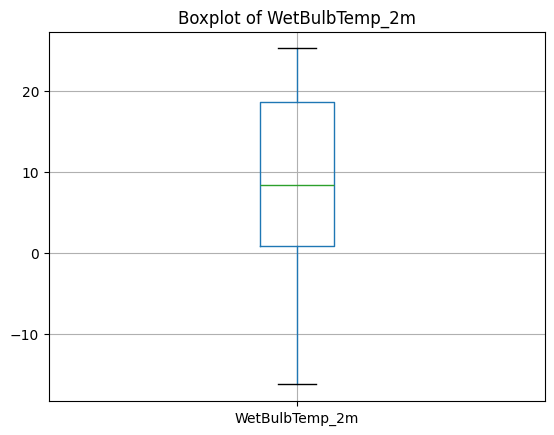

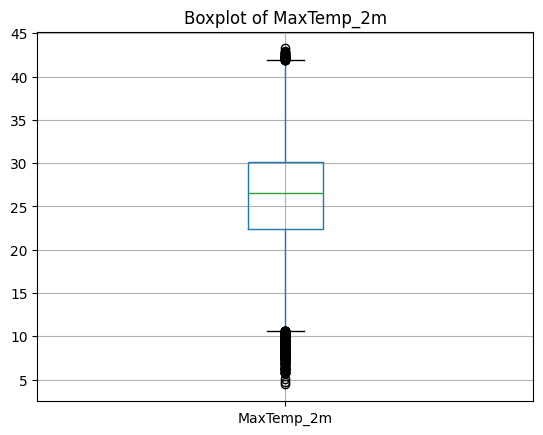

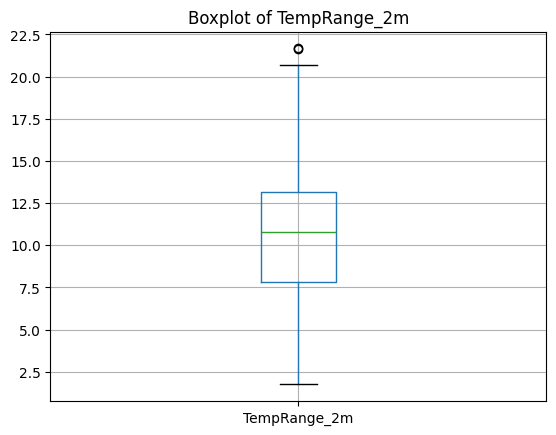

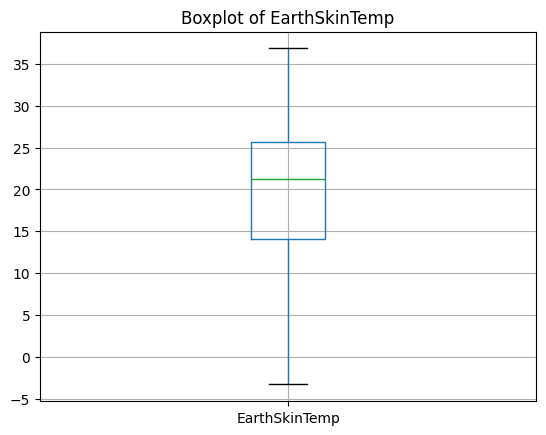

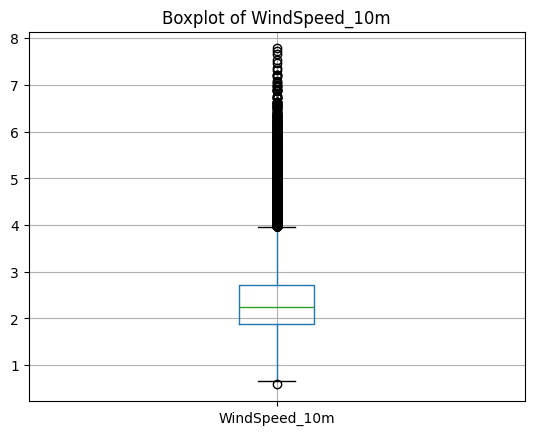

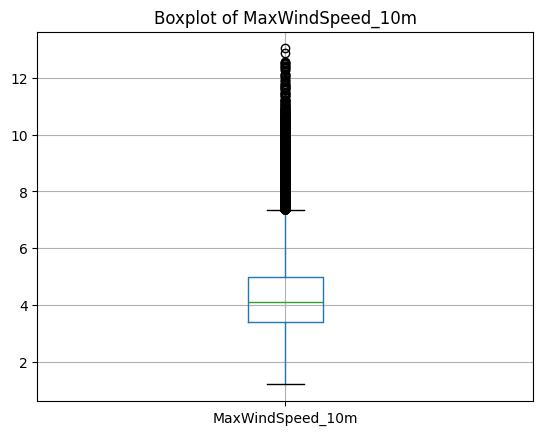

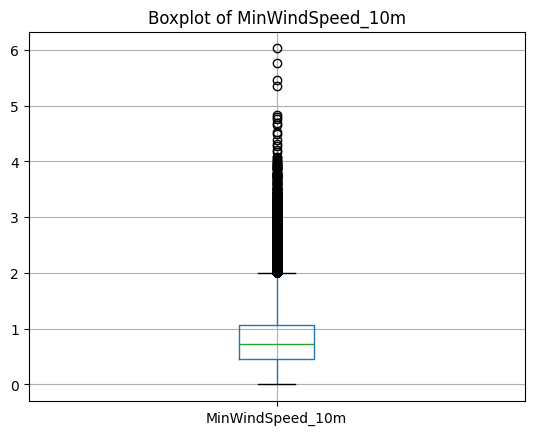

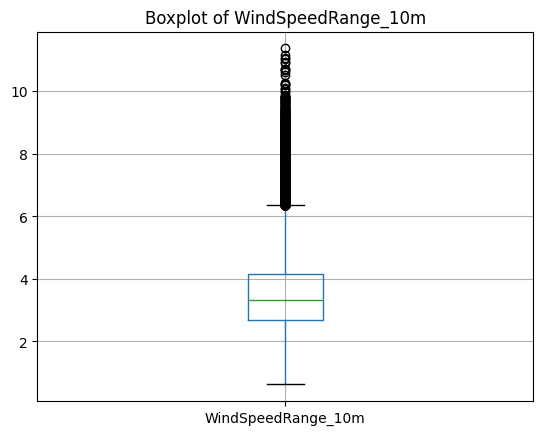

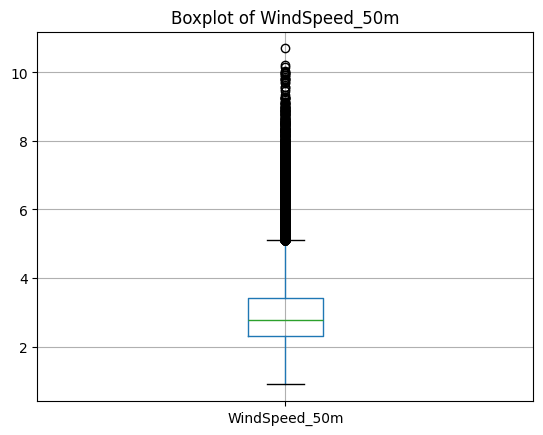

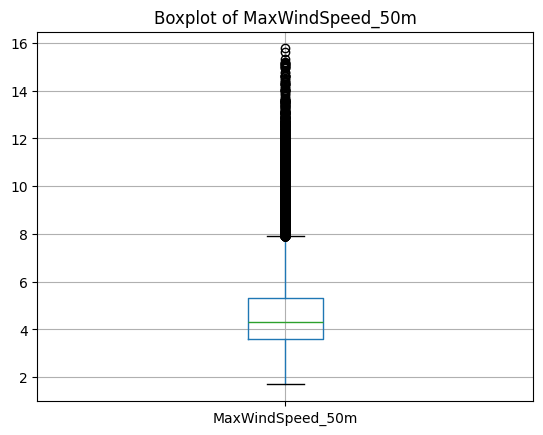

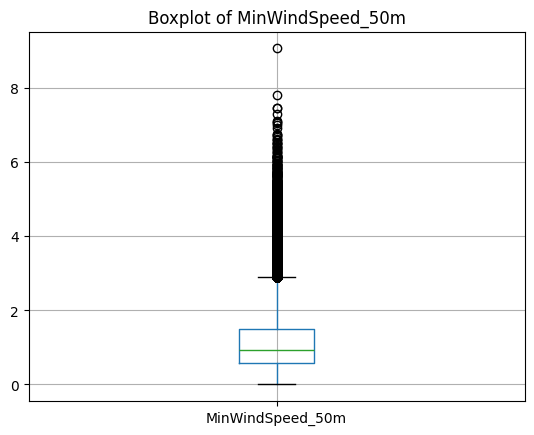

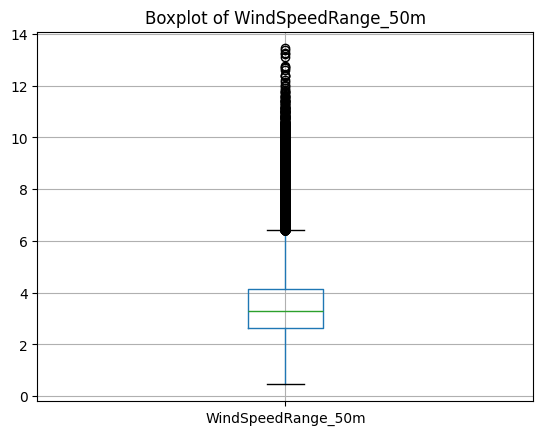

In [8]:
columns = ['Pressure','Precip','Humidity_2m','RH_2m','Temp_2m','WetBulbTemp_2m','MaxTemp_2m','TempRange_2m','EarthSkinTemp','WindSpeed_10m','MaxWindSpeed_10m','MinWindSpeed_10m','WindSpeedRange_10m','WindSpeed_50m','MaxWindSpeed_50m','MinWindSpeed_50m','WindSpeedRange_50m']
for i in columns:
    plt.figure()
    Wettest_districts.boxplot(column= i, grid= True)

    plt.title(f'Boxplot of {i}')
    plt.show()

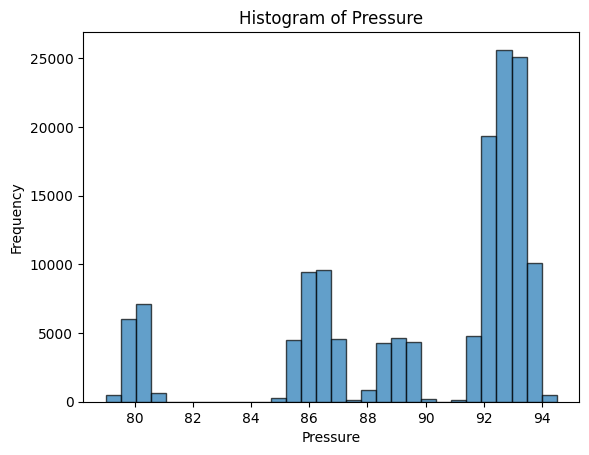

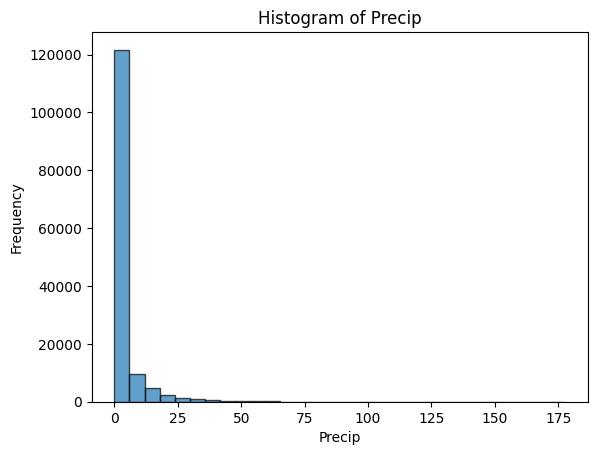

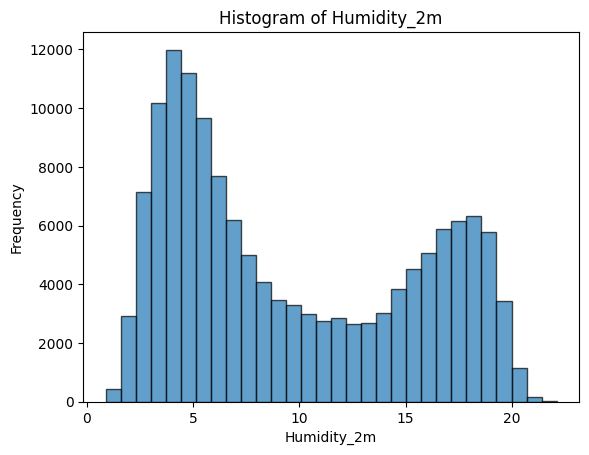

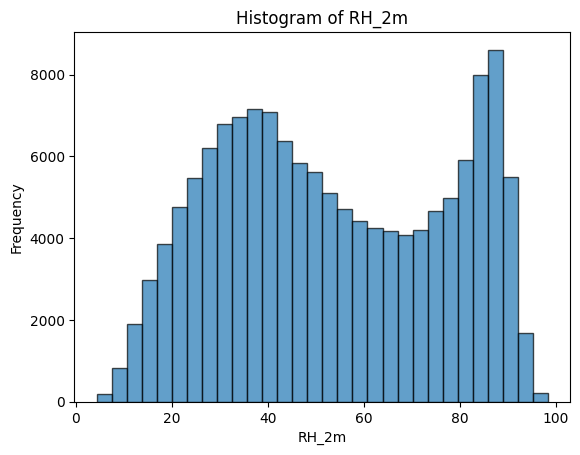

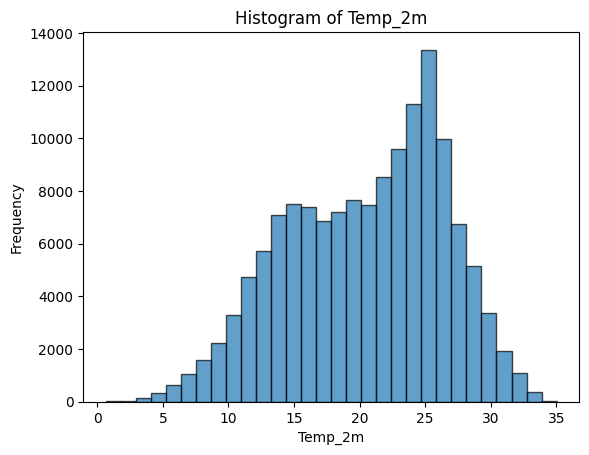

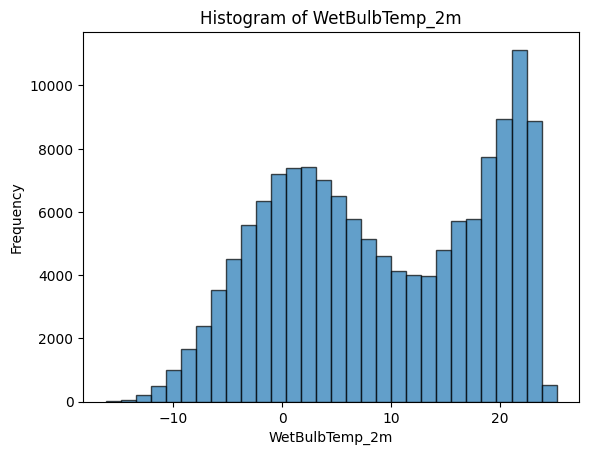

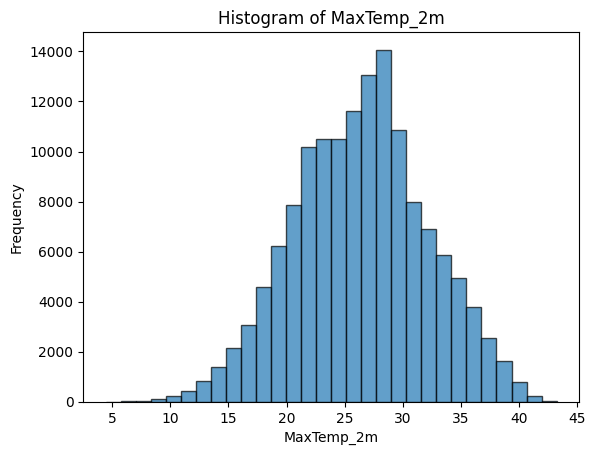

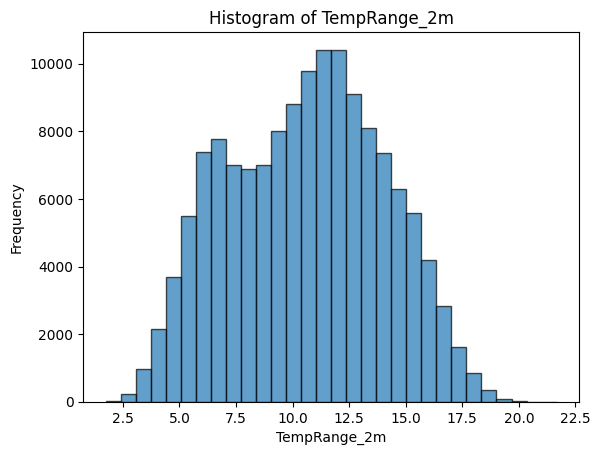

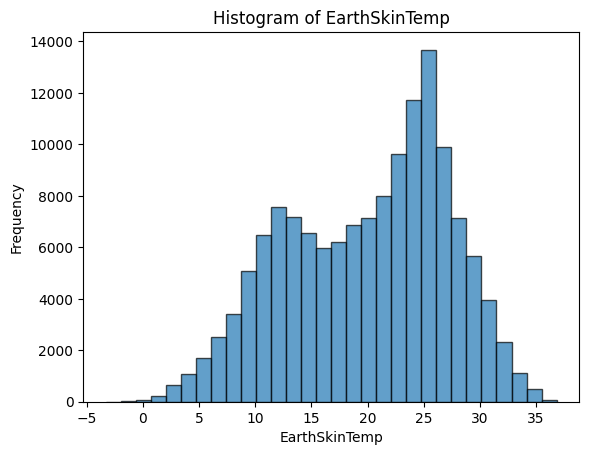

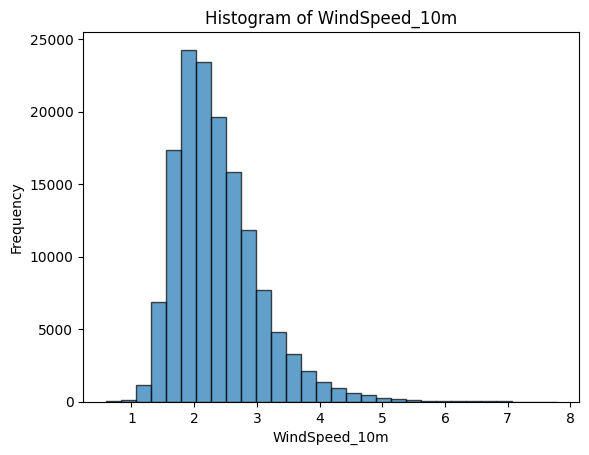

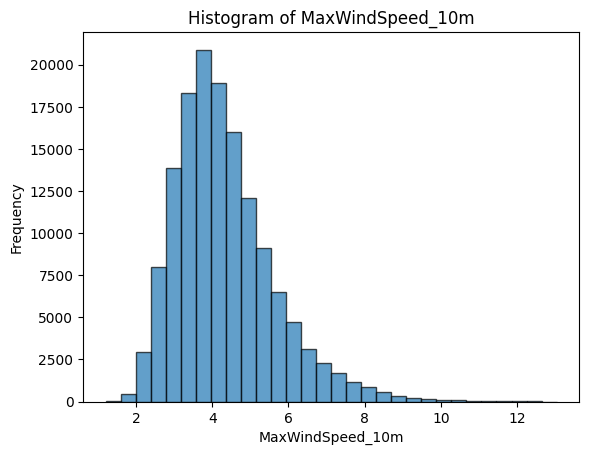

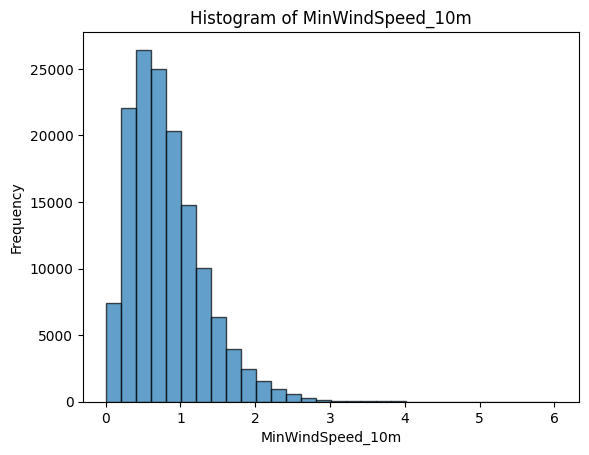

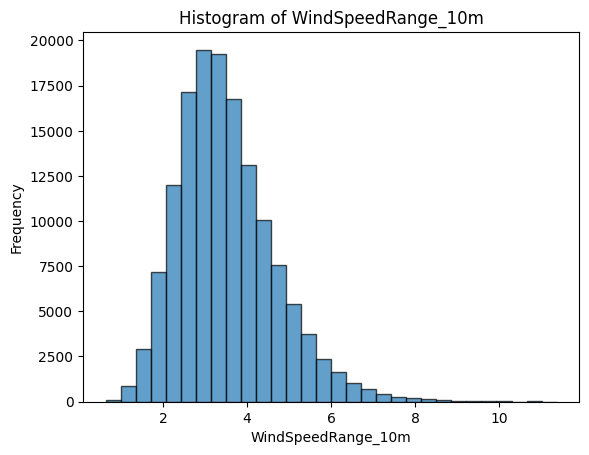

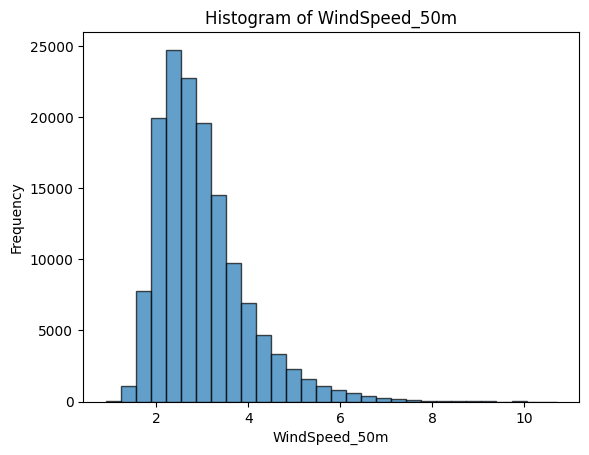

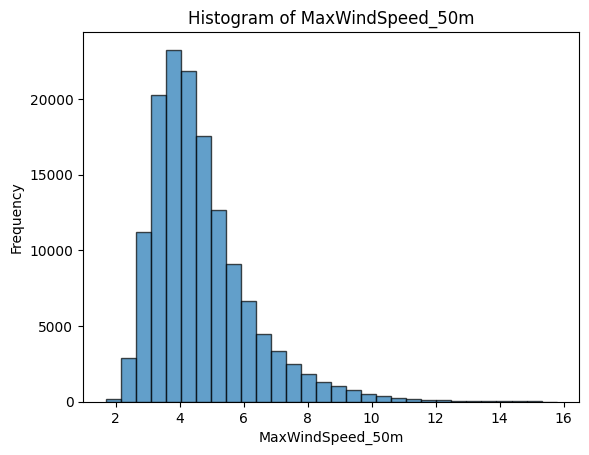

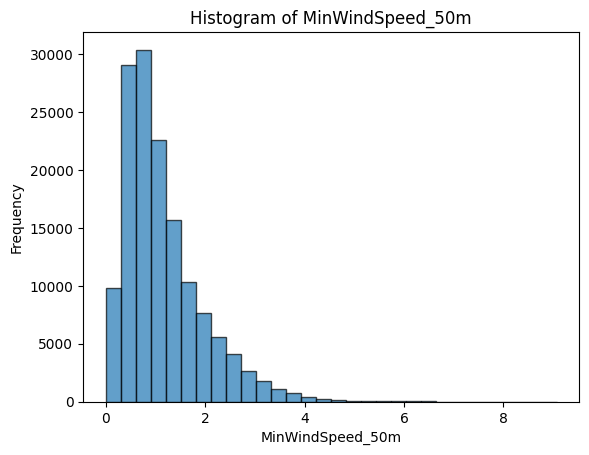

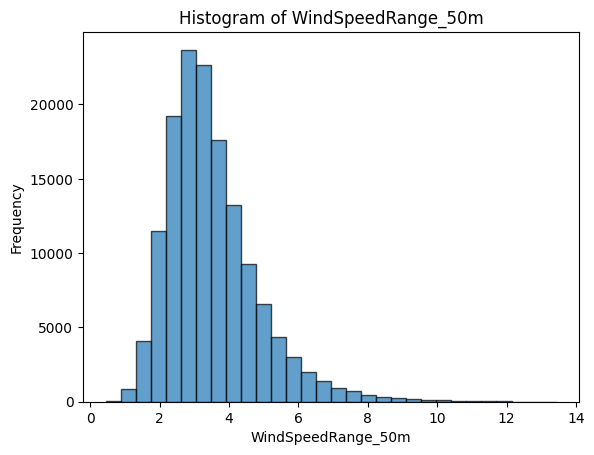

In [9]:
columns = ['Pressure','Precip','Humidity_2m','RH_2m','Temp_2m','WetBulbTemp_2m','MaxTemp_2m','TempRange_2m','EarthSkinTemp','WindSpeed_10m','MaxWindSpeed_10m','MinWindSpeed_10m','WindSpeedRange_10m','WindSpeed_50m','MaxWindSpeed_50m','MinWindSpeed_50m','WindSpeedRange_50m']
for i in columns:
  plt.hist(Wettest_districts[i], bins=30, edgecolor='black', alpha=0.7)
  plt.title(f'Histogram of {i}')
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.show()

In [10]:
#Since the precipitation histogram is heavily Right-Skewed, has lots of real outliers, we are going to use log transformation. 
Wettest_districts['precip_log'] = np.log(Wettest_districts['Precip'] + 1)
#we changed the normal precipitation value into it's log value. 
#we added +1 to get rid of zero values. 

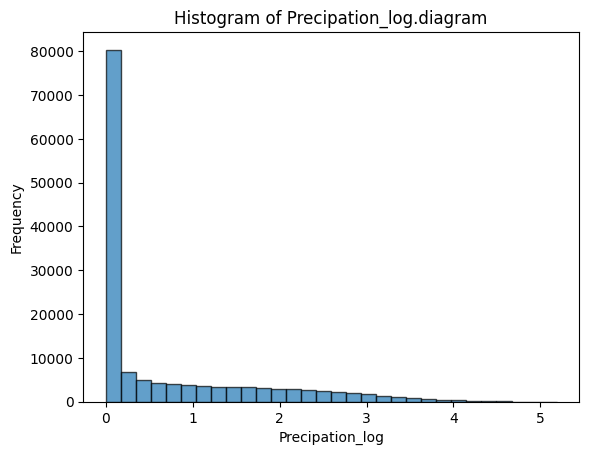

In [11]:
#Now, lets again look at the hist and outliers
plt.hist(Wettest_districts['precip_log'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Precipation_log.diagram')
plt.xlabel('Precipation_log')
plt.ylabel('Frequency')
plt.show()

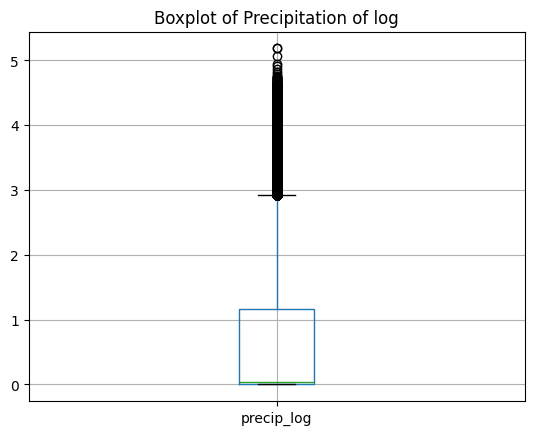

In [12]:
#Boxplot of Precipitation
Wettest_districts.boxplot(column= 'precip_log', grid= True)
plt.title('Boxplot of Precipitation of log')
plt.show()

In [13]:
Wettest_districts['precip_log'].describe()

count    142440.000000
mean          0.676026
std           0.998569
min           0.000000
25%           0.000000
50%           0.039221
75%           1.166271
max           5.186212
Name: precip_log, dtype: float64

In [14]:
Q1 = np.percentile(Wettest_districts['precip_log'], 25)#First quartile
Q3 = np.percentile(Wettest_districts['precip_log'], 75)#Third quartile
IQR = Q3 - Q1#Inter quartile range
print(IQR)
Lowerlimit = Q1 - 1.5 * IQR #lower starting point of outliers using IQR method.
Upperlimit = Q3 + 1.5 * IQR  #Upper starting point of outliers using IQR method.
outlierss = Wettest_districts[Wettest_districts['precip_log'] >Upperlimit].shape[0]
outlierss
print(f'The dataset contains {outlierss} number of outliers.')

1.1662709371419244
The dataset contains 6604 number of outliers.


There still are significant number of outliers, but since they are not too far from Upper limit, we might require them for modelling.

CREATING NEW FEATURES WHICH MIGHT RELATE TO PRECIPITATION

1. Dew Point

In [15]:
Wettest_districts['Dew_Point'] = Wettest_districts['Temp_2m'] - (100 - Wettest_districts['RH_2m']) / 5
Wettest_districts.head(10)

Unnamed: 0       Date      District  Latitude  Longitude  Precip  Pressure  \
0           0 1981-01-01  Arghakhanchi      27.9       83.2    0.00     93.51   
1           1 1981-01-02  Arghakhanchi      27.9       83.2    0.00     93.59   
2           2 1981-01-03  Arghakhanchi      27.9       83.2    0.03     93.55   
3           3 1981-01-04  Arghakhanchi      27.9       83.2    0.02     93.49   
4           4 1981-01-05  Arghakhanchi      27.9       83.2    1.84     93.49   
5           5 1981-01-06  Arghakhanchi      27.9       83.2    2.41     93.39   
6           6 1981-01-07  Arghakhanchi      27.9       83.2    2.20     93.44   
7           7 1981-01-08  Arghakhanchi      27.9       83.2    1.09     93.58   
8           8 1981-01-09  Arghakhanchi      27.9       83.2    0.04     93.89   
9           9 1981-01-10  Arghakhanchi      27.9       83.2    0.00     94.05   

   Humidity_2m  RH_2m  Temp_2m  ...  WindSpeed_10m  MaxWindSpeed_10m  \
0         4.81  45.41    13.89  ...           1.89              3.83   
1         4.94  46.78    13.84  ...           1.72              2.60   
2         5.22  47.91    14.33  ...           1.80              2.80   
3         5.36  50.83    13.82  ...           2.18              3.54   
4         5.84  55.55    13.76  ...           1.96              2.70   
5         6.02  59.18    13.24  ...           1.91              3.62   
6         6.12  65.22    12.02  ...           1.30              1.75   
7         5.12  57.60    11.21  ...           1.92              3.37   
8         4.75  53.49    11.26  ...           1.63              2.85   
9         4.68  51.00    11.77  ...           1.62              2.77   

   MinWindSpeed_10m  WindSpeedRange_10m  WindSpeed_50m  MaxWindSpeed_50m  \
0              0.69                3.14           2.41              4.12   
1              1.09                1.50           2.25              3.30   
2              0.48                2.32           2.32              3.54   
3              1.06                2.49           2.90              4.05   
4              0.69                2.02           2.74              4.64   
5              0.74                2.89           2.56              3.98   
6              0.76                0.99           1.74              2.60   
7              0.98                2.39           2.56              3.55   
8              0.53                2.32           2.00              2.69   
9              0.91                1.86           2.02              2.74   

   MinWindSpeed_50m  WindSpeedRange_50m  precip_log  Dew_Point  
0              0.73                3.39    0.000000      2.972  
1              0.96                2.34    0.000000      3.196  
2              0.39                3.15    0.029559      3.912  
3              0.93                3.12    0.019803      3.986  
4              0.96                3.68    1.043804      4.870  
5              0.76                3.22    1.226712      5.076  
6              0.93                1.66    1.163151      5.064  
7              1.50                2.05    0.737164      2.730  
8              0.61                2.08    0.039221      1.958  
9              1.27                1.47    0.000000      1.970  

[10 rows x 25 columns]

2. VAPOR PRESSURE DEFICIT (VPD)

In [16]:
Wettest_districts['SVP'] = 0.6108*np.exp((Wettest_districts['Temp_2m']*17.27)/(Wettest_districts['Temp_2m'] + 273))

In [17]:
Wettest_districts['VPD'] = Wettest_districts['SVP']*(1-Wettest_districts['RH_2m']/100)

3. CALCULATING THE HEAT INDEX

In [18]:
#Changing degree celcius into farenheit
Wettest_districts['Farenheit']=Wettest_districts['Temp_2m']*5/9+32

In [19]:
#Calculating heat index
Wettest_districts['HI'] = (-42.379 + 2.04901523 * Wettest_districts['Farenheit']+
          10.14333127 * Wettest_districts['RH_2m'] -
          0.22475541 * Wettest_districts['Farenheit'] *Wettest_districts['RH_2m'] -
          6.83783e-03 * Wettest_districts['Farenheit']**2 -
          5.481717e-02 * Wettest_districts['RH_2m']**2 +
          1.22874e-03 * Wettest_districts['Farenheit']**2 * Wettest_districts['RH_2m'] +
          8.5282e-04 * Wettest_districts['Farenheit'] * Wettest_districts['RH_2m']**2 -
          1.99e-06 * Wettest_districts['Farenheit'] * Wettest_districts['RH_2m']**2)

CHANGING MONTHS INTO SEASON.
1 indicates Winter
2 indicates Spring
3 indicates Summer
4 indicates Autumn

In [20]:
Wettest_districts['Month'] = Wettest_districts['Date'].dt.month
Wettest_districts['Season'] = (Wettest_districts['Date'].dt.month % 12 + 3) // 3

In [21]:
Wettest_districts[Wettest_districts['Season'] == 3]

Unnamed: 0       Date      District  Latitude  Longitude  Precip  \
151            151 1981-06-01  Arghakhanchi      27.9       83.2    1.42   
152            152 1981-06-02  Arghakhanchi      27.9       83.2    0.23   
153            153 1981-06-03  Arghakhanchi      27.9       83.2    0.09   
154            154 1981-06-04  Arghakhanchi      27.9       83.2    0.33   
155            155 1981-06-05  Arghakhanchi      27.9       83.2    0.22   
...            ...        ...           ...       ...        ...     ...   
826025      826025 2019-08-27       Syangja      28.0       83.8    0.30   
826026      826026 2019-08-28       Syangja      28.0       83.8    3.18   
826027      826027 2019-08-29       Syangja      28.0       83.8   12.99   
826028      826028 2019-08-30       Syangja      28.0       83.8    0.76   
826029      826029 2019-08-31       Syangja      28.0       83.8   13.29   

        Pressure  Humidity_2m  RH_2m  Temp_2m  ...  MinWindSpeed_50m  \
151        92.66        11.89  44.34    28.82  ...              1.48   
152        92.57        11.41  40.55    29.65  ...              1.73   
153        92.30         7.91  25.81    31.13  ...              1.29   
154        92.16         6.09  19.48    31.48  ...              2.97   
155        92.23         5.08  17.04    30.66  ...              2.33   
...          ...          ...    ...      ...  ...               ...   
826025     85.76        17.76  85.71    22.96  ...              0.64   
826026     85.86        17.98  85.80    23.21  ...              0.38   
826027     85.90        18.06  92.72    22.00  ...              0.69   
826028     85.65        17.45  82.95    23.22  ...              0.16   
826029     85.54        18.09  90.12    22.46  ...              0.26   

        WindSpeedRange_50m  precip_log  Dew_Point       SVP       VPD  \
151                   3.51    0.883768     17.688  3.177457  1.768573   
152                   3.69    0.207014     17.760  3.316536  1.971680   
153                   8.05    0.086178     16.292  3.577732  2.654319   
154                   5.27    0.285179     15.376  3.642058  2.932585   
155                   9.22    0.198851     14.068  3.492909  2.897717   
...                    ...         ...        ...       ...       ...   
826025                2.64    0.262364     20.102  2.332142  0.333263   
826026                2.40    1.430311     20.370  2.363710  0.335647   
826027                3.88    2.638343     20.544  2.214323  0.161203   
826028                3.41    0.565314     19.810  2.364980  0.403229   
826029                4.59    2.659560     20.484  2.270111  0.224287   

        Farenheit          HI  Month  Season  
151     48.011111  109.652059      6       3  
152     48.472222  105.165145      6       3  
153     49.294444   86.341184      6       3  
154     49.488889   76.994933      6       3  
155     49.033333   73.240711      6       3  
...           ...         ...    ...     ...  
826025  44.755556  130.846253      8       3  
826026  44.894444  130.520726      8       3  
826027  44.222222  128.793190      8       3  
826028  44.900000  131.292133      8       3  
826029  44.477778  129.655773      8       3  

[35880 rows x 31 columns]

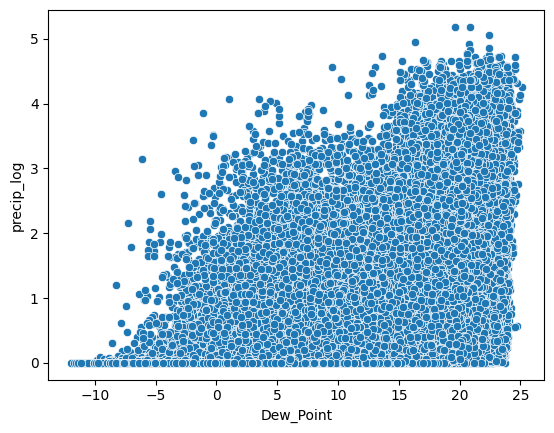

In [22]:
%matplotlib inline
sns.scatterplot(x=Wettest_districts['Dew_Point'], y=Wettest_districts['precip_log'])
plt.show()


In [23]:
Wettest_districts.columns

Index(['Unnamed: 0', 'Date', 'District', 'Latitude', 'Longitude', 'Precip',
       'Pressure', 'Humidity_2m', 'RH_2m', 'Temp_2m', 'WetBulbTemp_2m',
       'MaxTemp_2m', 'MinTemp_2m', 'TempRange_2m', 'EarthSkinTemp',
       'WindSpeed_10m', 'MaxWindSpeed_10m', 'MinWindSpeed_10m',
       'WindSpeedRange_10m', 'WindSpeed_50m', 'MaxWindSpeed_50m',
       'MinWindSpeed_50m', 'WindSpeedRange_50m', 'precip_log', 'Dew_Point',
       'SVP', 'VPD', 'Farenheit', 'HI', 'Month', 'Season'],
      dtype='object')

#Scatterplot of Precipitation log vs other cireterion to viaualize the relationship betn them. 

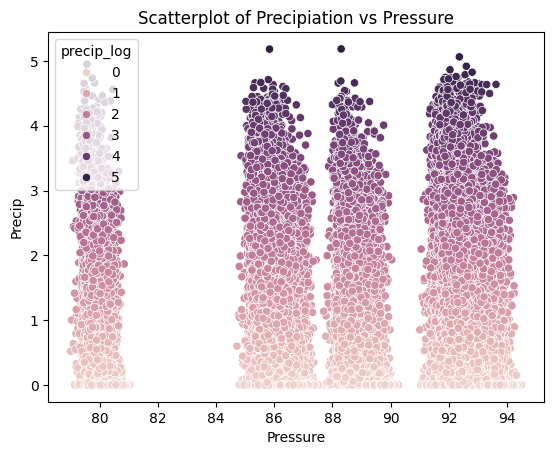

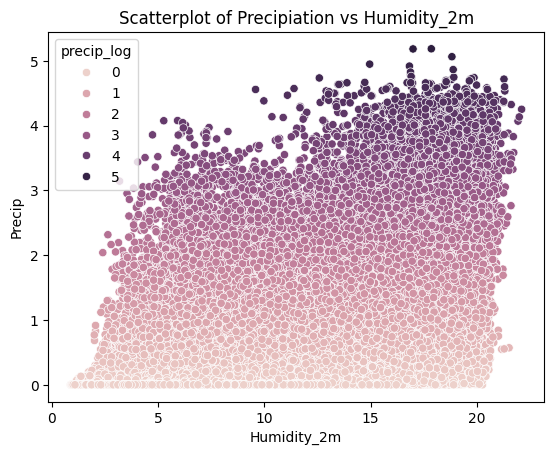

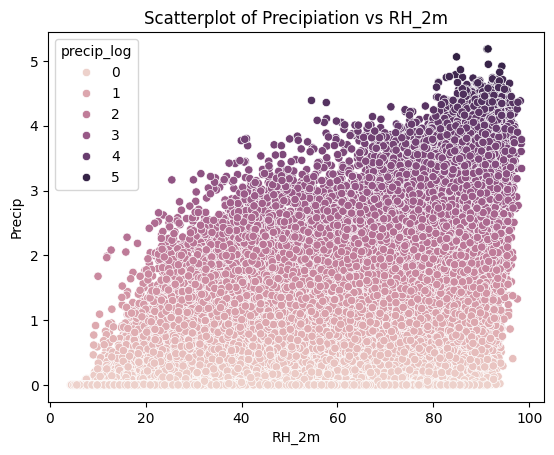

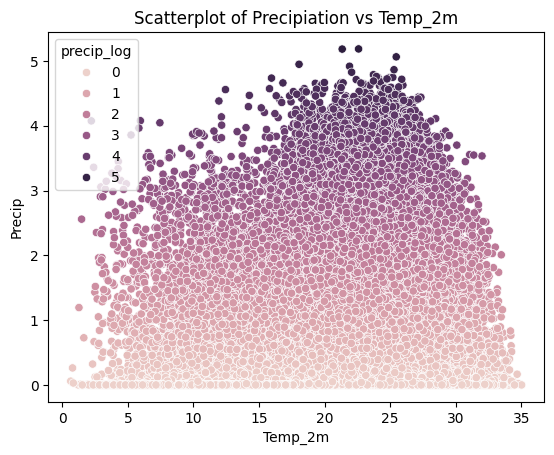

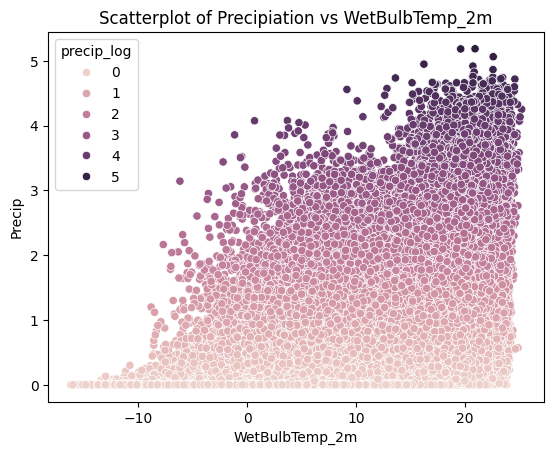

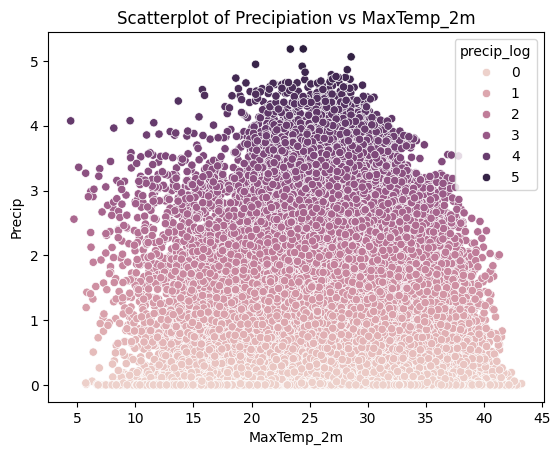

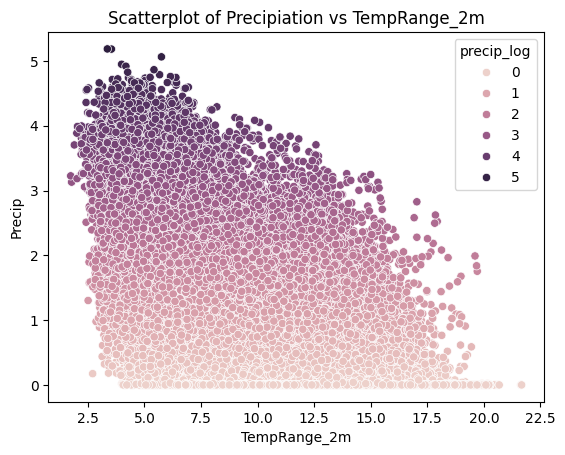

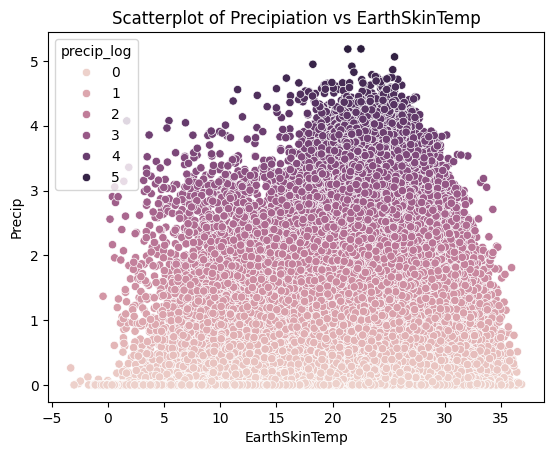

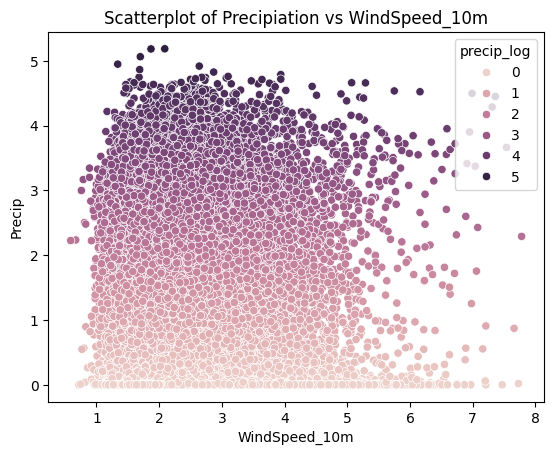

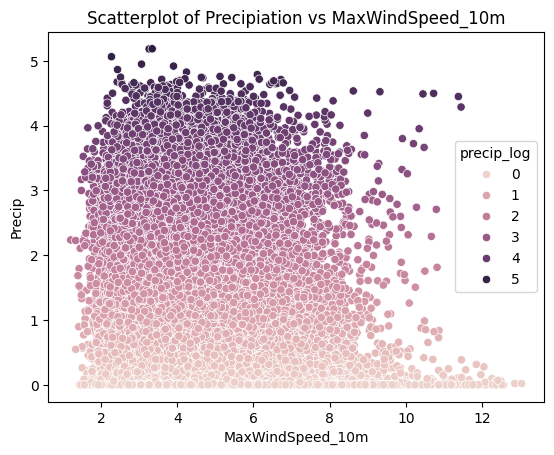

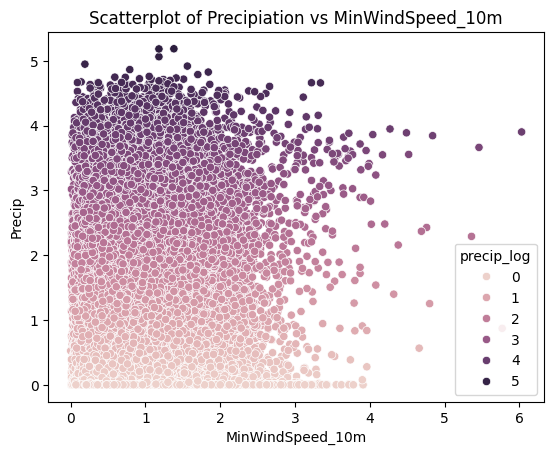

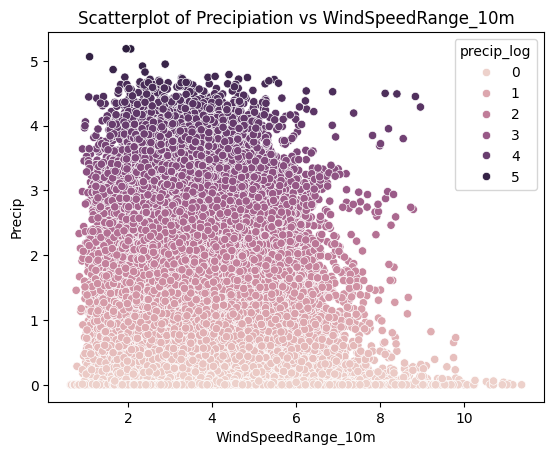

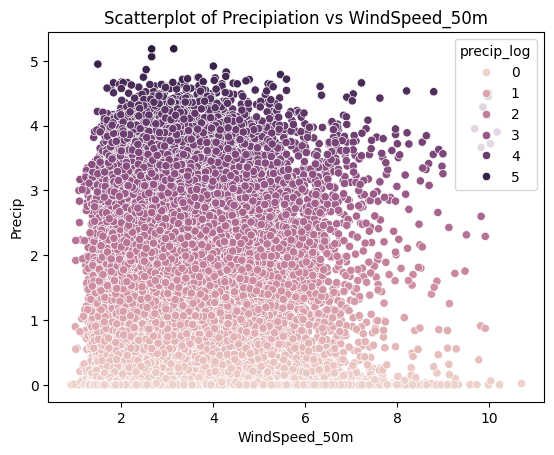

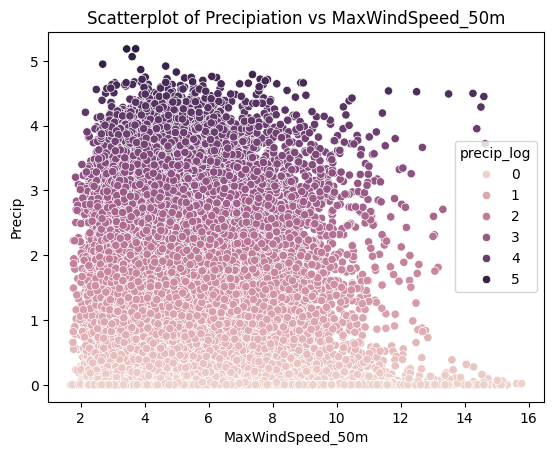

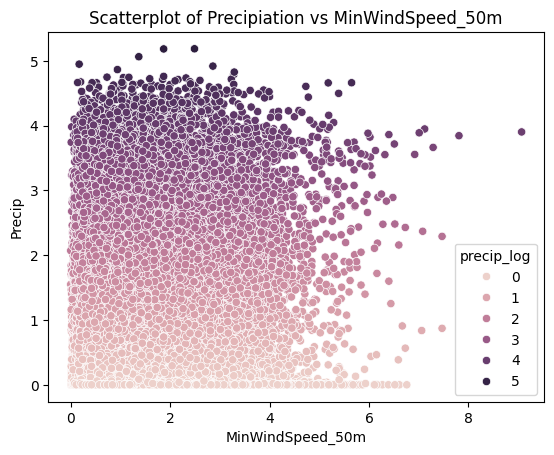

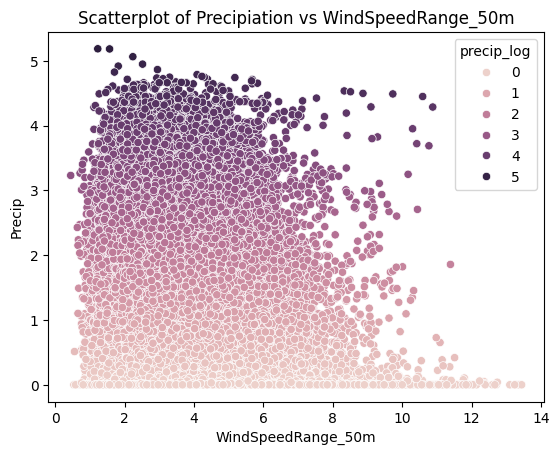

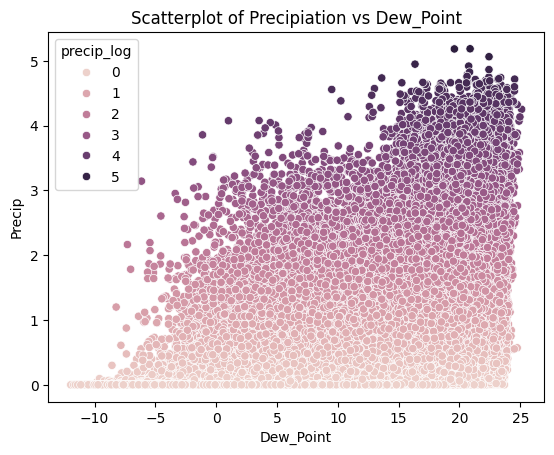

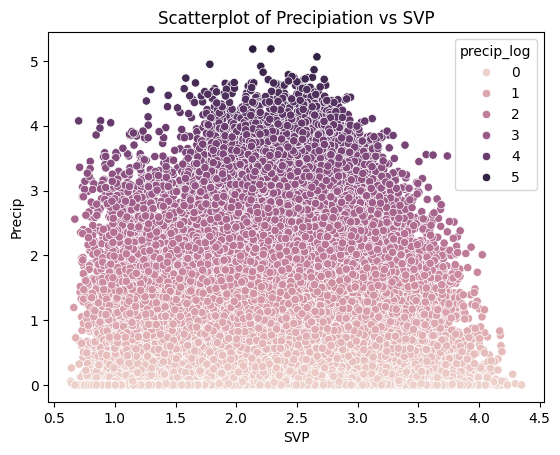

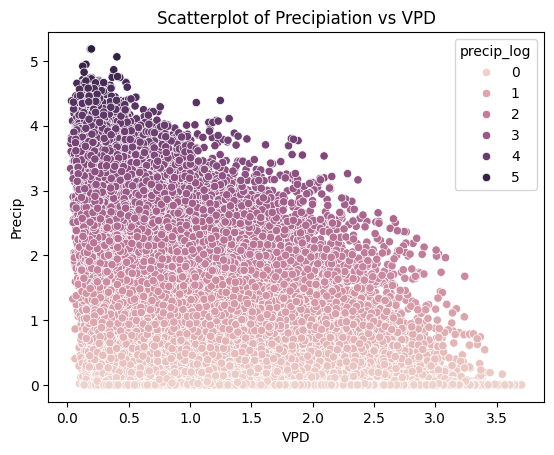

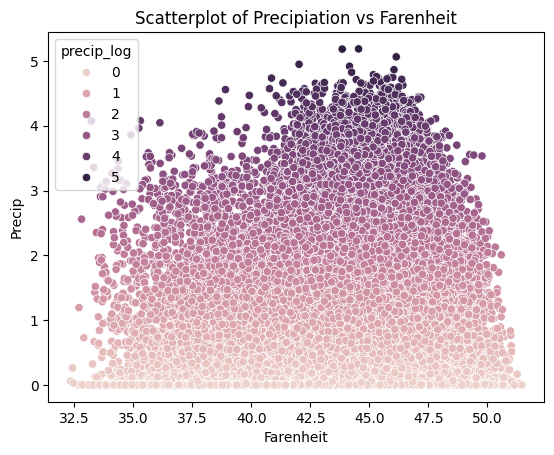

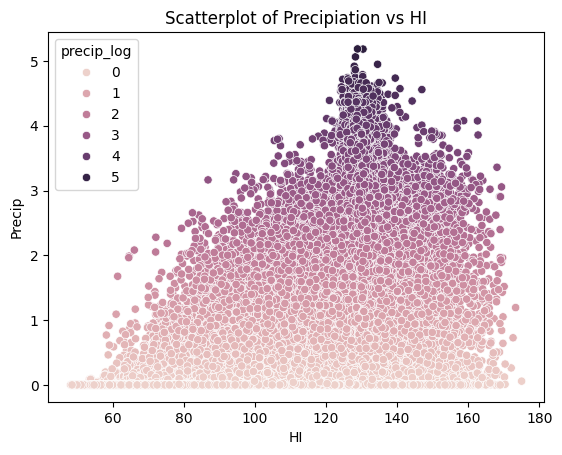

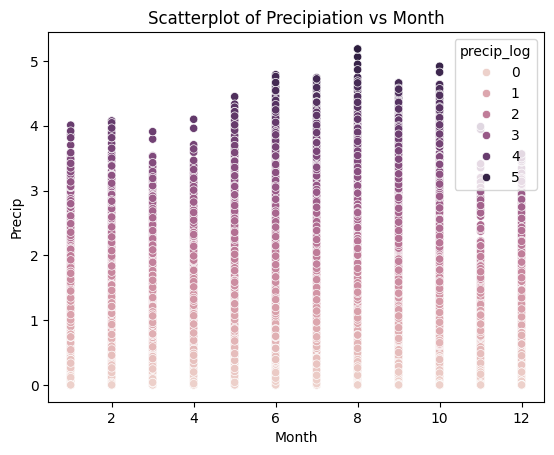

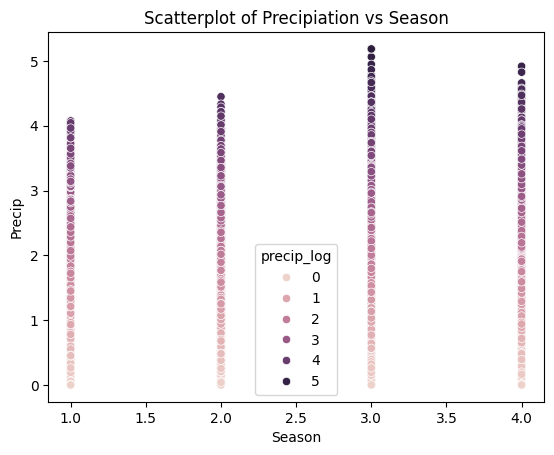

In [24]:
columns = ['Pressure','Humidity_2m','RH_2m','Temp_2m','WetBulbTemp_2m','MaxTemp_2m','TempRange_2m','EarthSkinTemp','WindSpeed_10m','MaxWindSpeed_10m','MinWindSpeed_10m','WindSpeedRange_10m','WindSpeed_50m','MaxWindSpeed_50m','MinWindSpeed_50m','WindSpeedRange_50m', 'Dew_Point',
        'SVP', 'VPD', 'Farenheit', 'HI', 'Month', 'Season']
for i in columns:
    plt.figure()
    sns.scatterplot(y=Wettest_districts['precip_log'], x=Wettest_districts[i], hue=Wettest_districts['precip_log'], color = 'cyan')
    plt.ylabel('Precip')
    plt.xlabel(i)
    plt.title(f'Scatterplot of Precipiation vs {i}')
    plt.show()

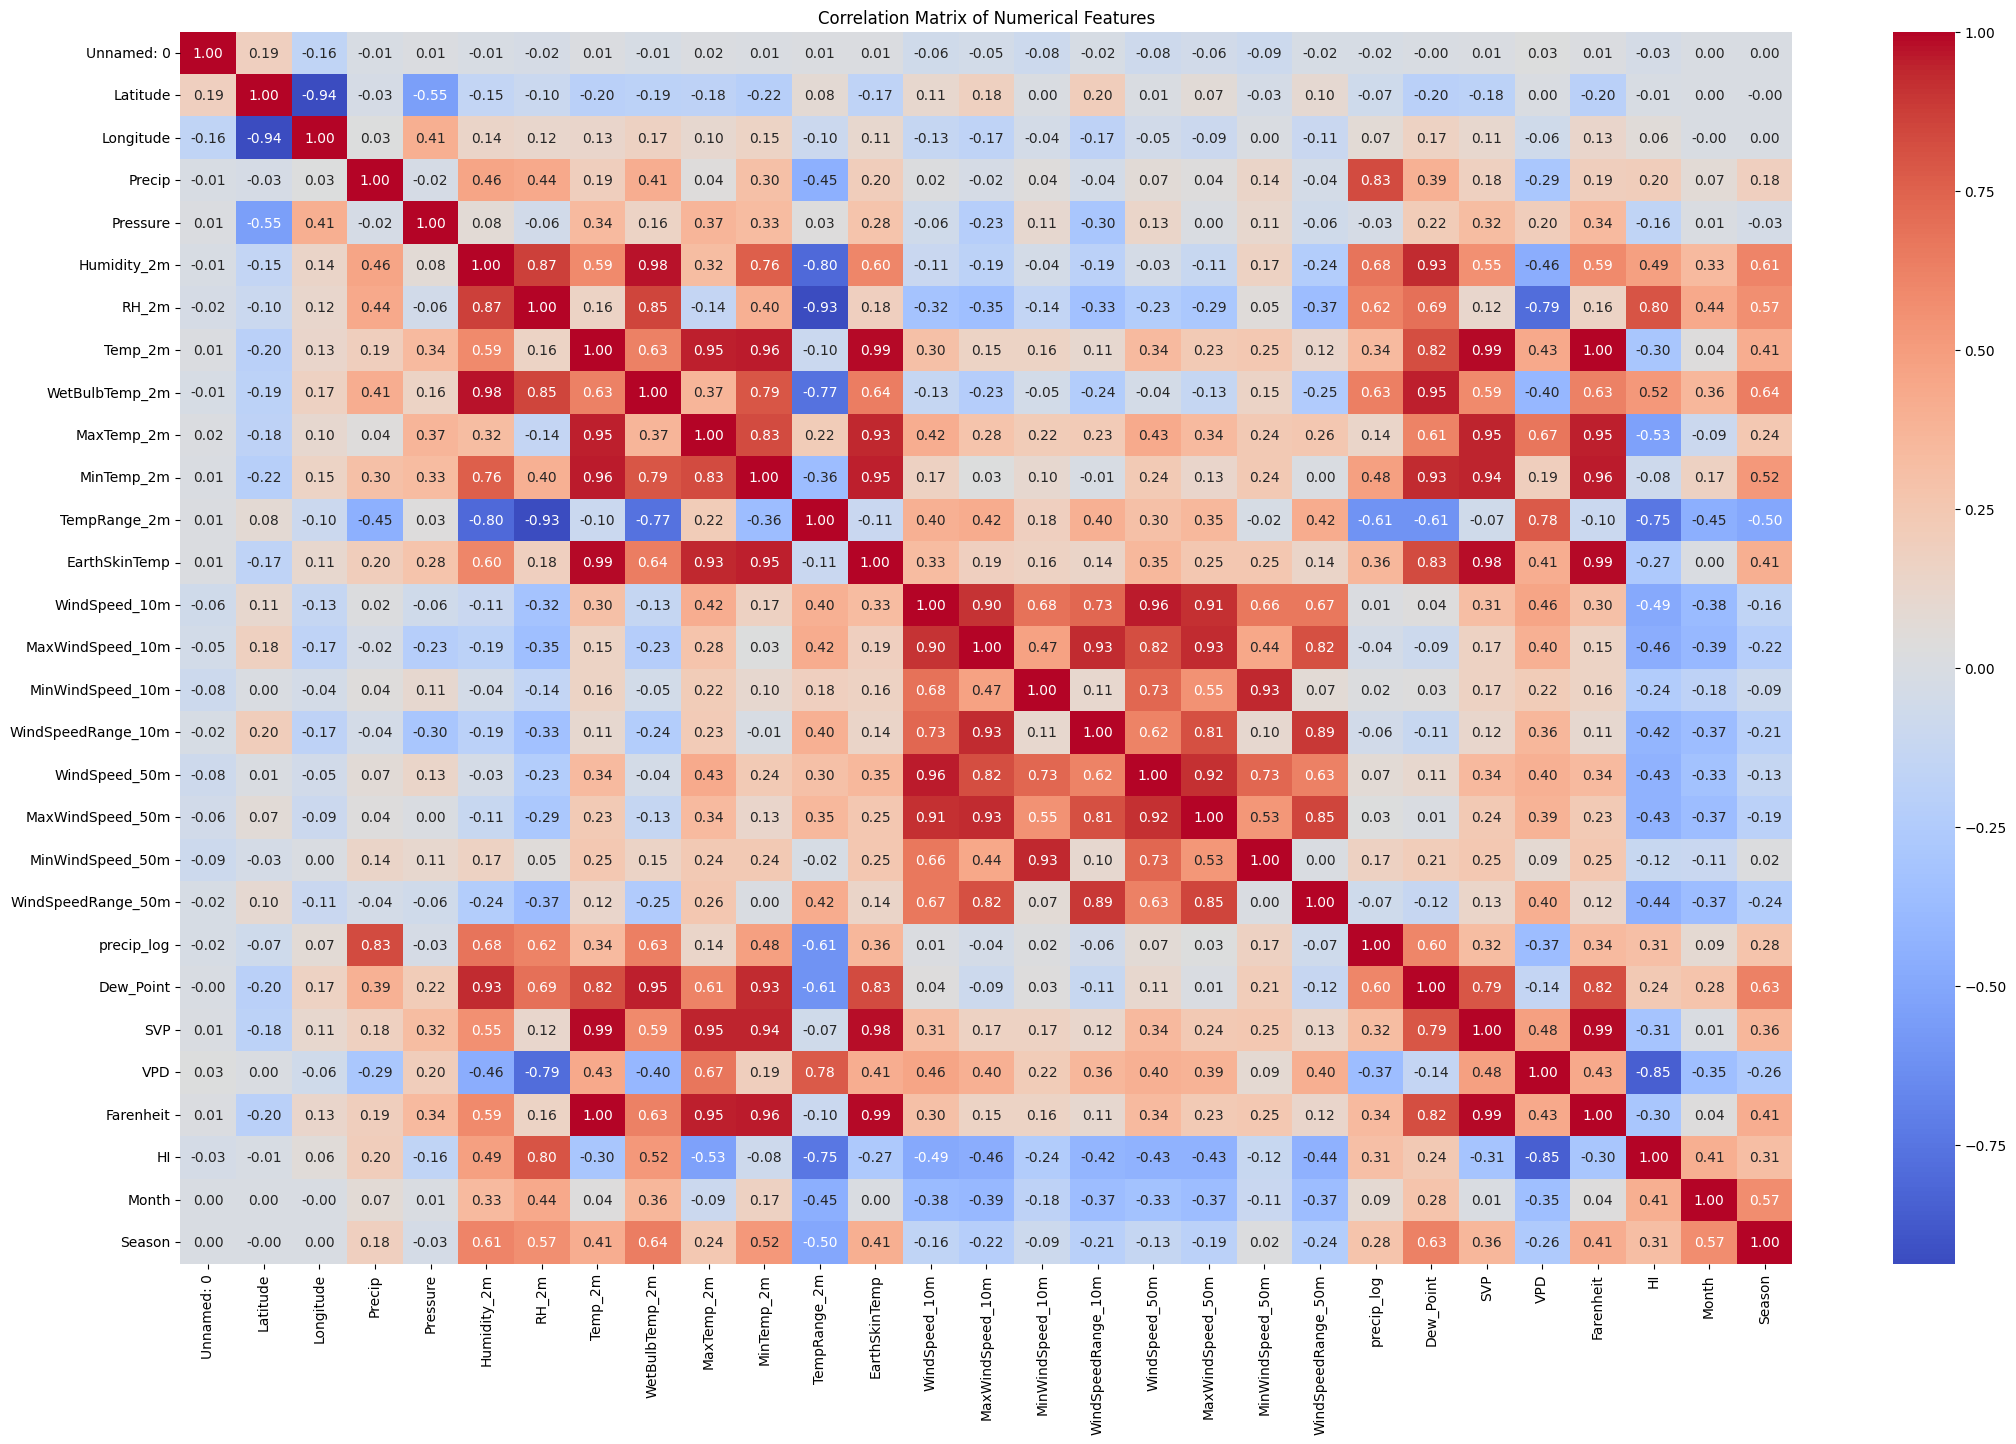

In [25]:
numerical_df = Wettest_districts.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(26, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


Since from the scatterplot, the data seems not so linear, we also use Spearmen coefficient to calculaate the corrleation

In [26]:

from scipy.stats import spearmanr
#Predicting column
Prediction = 'precip_log'

#Creating a dictionary to store the corrleation results.
spearman_results = {}

# for loop to manually correlate every other variable.
for feature in numerical_df.columns:
    if feature != Prediction:  # Skipping the predicting/target variable
        corr, p_value = spearmanr(numerical_df[feature], numerical_df[Prediction])
        spearman_results[feature] = {'Spearman_Correlation': corr, 'P-value': p_value}

# Printing the results
for feature, result in spearman_results.items():
    print(f"Feature: {feature}, Spearman's Rank Correlation: {result['Spearman_Correlation']:.4f}, P-value: {result['P-value']:.4f}")

Feature: Unnamed: 0, Spearman's Rank Correlation: -0.0077, P-value: 0.0035
Feature: Latitude, Spearman's Rank Correlation: -0.0747, P-value: 0.0000
Feature: Longitude, Spearman's Rank Correlation: 0.0752, P-value: 0.0000
Feature: Precip, Spearman's Rank Correlation: 1.0000, P-value: 0.0000
Feature: Pressure, Spearman's Rank Correlation: -0.1932, P-value: 0.0000
Feature: Humidity_2m, Spearman's Rank Correlation: 0.7335, P-value: 0.0000
Feature: RH_2m, Spearman's Rank Correlation: 0.6315, P-value: 0.0000
Feature: Temp_2m, Spearman's Rank Correlation: 0.4724, P-value: 0.0000
Feature: WetBulbTemp_2m, Spearman's Rank Correlation: 0.7240, P-value: 0.0000
Feature: MaxTemp_2m, Spearman's Rank Correlation: 0.2898, P-value: 0.0000
Feature: MinTemp_2m, Spearman's Rank Correlation: 0.6005, P-value: 0.0000
Feature: TempRange_2m, Spearman's Rank Correlation: -0.5958, P-value: 0.0000
Feature: EarthSkinTemp, Spearman's Rank Correlation: 0.5023, P-value: 0.0000
Feature: WindSpeed_10m, Spearman's Rank C

As we can see from Spearmen's corrleation coefficient, the columns with the highest degree of corrleation with Precipitation are Humidity, Wetbulb temperature and dew point. 
Other values having a high positive or negative corrleation are Relative humidity, earth skin temperature and minimum temperature. 
Temp 2_m and Temprange_2m also have moderate to high positive and negative corrleation respectively. 


While selecting the features we use Spearman's corrleation in conjunction with domian knowledge. 

let's select the following features which are highly corrleated with 'Precip_log' while having high impact on rainfall. 
1. Humidity_2m
2. Pressure
3. MaxTemp_m
4. Dew_Point
5. EarthSkinTemp
6. SVP
7. Season

Let's create a model using the following features. 
WE ARE GOING TO USE RANDOM FOREST MODEL BECAUSE OF FOLLOWING REASONS. 
1. NOT THAT LINEAR RELATIONSHIP
2. MULTI COLLINEARITY
3. SOME OUTLIERS WHICH HAVE IMPACT ON OTHER DATAS HENCE CANNOT BE REMOVED

Let's split the data in training and testing sets. 

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [28]:
mean_prediction = Wettest_districts['precip_log'].mean()
baseline_prediction_mean = np.full_like(Wettest_districts['precip_log'],mean_prediction)
baseline_rmse_mean = np.sqrt(mean_squared_error(Wettest_districts['precip_log'], baseline_prediction_mean))
baseline_rmse_mean

0.9985653397881512

Let's select the necessary columns.

In [29]:
X = Wettest_districts[[ 'Humidity_2m','Pressure','MaxTemp_2m','Dew_Point','EarthSkinTemp','SVP','Month' ]]
y  = Wettest_districts['precip_log']

Define the model. 

In [30]:
model = RandomForestRegressor()

Let's split the data into training and testing data, and fit the model.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit the model to your training data
model.fit(X_train, y_train)

RandomForestRegressor()

Let's make predictions to evaluate the model. 

In [32]:
# Making Predictions.
predictions = model.predict(X_test)
y_pred = model.predict(X_test)

#let's evaluate the model.
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

Mean Squared Error: 0.3537393976296649
0.5947599495844226


Now, lets train the hyper parameters and Re-train the model to increase it's accuracy. 

In [33]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [80,100,120,140],
    'max_depth': [2,4,6,8,10],
    'min_samples_split': [4,6,8]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, n_jobs = -1)#CV=Cross-validation, N-jobs to use all CPU cores to make things faster
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 6, 'n_estimators': 100}


Since we got the best Parameters, lets again train the model with these parameters and see if we get any better result. 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit the model to your training data
model = RandomForestRegressor( max_depth =10, min_samples_split =4, n_estimators = 140)
model.fit(X_train, y_train)


#let,s predict again. 
y_pred = model.predict(X_test)


# Fit the model to your training data
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

0.5989768721569845


param_grid = {
    'n_estimators': [140,160,180],
    'max_depth': [10,12,14],
    'min_samples_split': [4,6,8]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, n_jobs = -1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit the model to your training data
model = RandomForestRegressor( max_depth =14, min_samples_split =8, n_estimators = 160)
model.fit(X_train, y_train)


#let,s predict again. 
y_pred = model.predict(X_test)


# Fit the model to your training data
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

0.5909170169050574


param_grid = {
    'n_estimators': [160,180,200],
    'max_depth': [14,16,18],
    'min_samples_split': [8,10,12]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, n_jobs = -1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit the model to your training data
model = RandomForestRegressor( max_depth =18, min_samples_split =10, n_estimators = 200)
model.fit(X_train, y_train)


#let,s predict again. 
y_pred = model.predict(X_test)


# Fit the model to your training data
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

0.590126888810111


param_grid = {
    'n_estimators': [200,220,240],
    'max_depth': [18,20,24],
    'min_samples_split': [10,12,14,16]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, n_jobs = -1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit the model to your training data
model = RandomForestRegressor( max_depth =18, min_samples_split =16, n_estimators = 240)
model.fit(X_train, y_train)


#let,s predict again. 
y_pred = model.predict(X_test)


# Fit the model to your training data
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

0.5898166980314513


param_grid = {
    'n_estimators': [260,280,300],
    'max_depth': [18,20,24],
    'min_samples_split': [18,20,22,24]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, n_jobs = -1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Fit the model to your training data
model = RandomForestRegressor( max_depth =20, min_samples_split =20, n_estimators = 280)
model.fit(X_train, y_train)


#let,s predict again. 
y_pred = model.predict(X_test)


# Fit the model to your training data
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

0.5897545661787661


Since the improvement is miniscule, we stop our iteration here. We take this as our final model. 

In [39]:
#Final Results
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

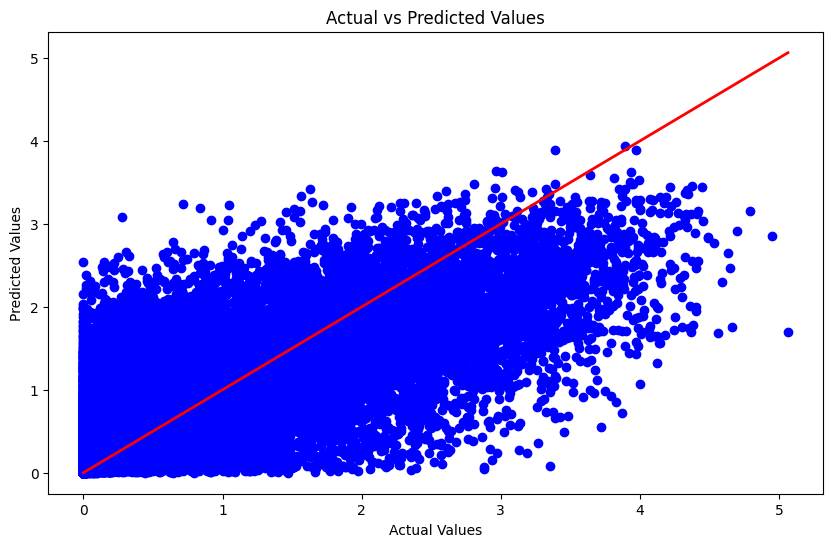

In [40]:
#Let's plot the Actual vs Predicted value
plt.figure(figsize=(10, 6))
plt.scatter(results['Actual'], results['Predicted'], color='blue')
plt.plot([results['Actual'].min(), results['Actual'].max()], [results['Actual'].min(), results['Actual'].max()], color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [41]:
results

Actual  Predicted
11542   1.856298   1.686062
315682  1.376244   1.610216
600575  0.000000   0.119027
814237  0.000000   0.186475
685521  0.000000   0.006185
...          ...        ...
321524  0.190620   1.197521
697844  2.482404   1.470036
340502  0.837248   0.677660
287334  1.827770   2.167456
694991  0.000000   0.054734

[28488 rows x 2 columns]

In [42]:
#changing Original precip_log into Natural precipitation
results['Precipitation'] = np.exp(results['Actual']) - 1

In [43]:
#changing Predicted precip_log into Natural precipitation
results['Predicted_precipitation'] = np.exp(results['Predicted']) - 1

In [44]:
#Final dataframe
results

Actual  Predicted  Precipitation  Predicted_precipitation
11542   1.856298   1.686062           5.40                 4.398181
315682  1.376244   1.610216           2.96                 4.003892
600575  0.000000   0.119027           0.00                 0.126400
814237  0.000000   0.186475           0.00                 0.204995
685521  0.000000   0.006185           0.00                 0.006204
...          ...        ...            ...                      ...
321524  0.190620   1.197521           0.21                 2.311898
697844  2.482404   1.470036          10.97                 3.349392
340502  0.837248   0.677660           1.31                 0.969264
287334  1.827770   2.167456           5.22                 7.736028
694991  0.000000   0.054734           0.00                 0.056260

[28488 rows x 4 columns]

In [45]:
#Tested Dataframe
X_test

Humidity_2m  Pressure  MaxTemp_2m  Dew_Point  EarthSkinTemp       SVP  \
11542         19.04     92.62       28.79     22.674          25.80  2.650980   
315682        11.43     92.78       26.31     14.718          22.83  2.166789   
600575         5.76     92.51       37.62     13.790          30.64  3.325081   
814237         5.89     85.70       32.61     10.100          26.06  2.576103   
685521         6.99     93.47       23.80      7.742          15.13  1.667860   
...             ...       ...         ...        ...            ...       ...   
321524        11.17     92.54       29.01     15.072          25.74  2.468569   
697844        20.33     92.39       29.46     23.726          26.11  2.778543   
340502         9.74     92.78       33.90     15.454          27.87  2.991614   
287334        13.65     80.11       19.05     15.046          17.07  1.644605   
694991         8.79     93.36       23.40     10.648          15.99  1.743251   

        Month  
11542       8  
315682      5  
600575      5  
814237      5  
685521     12  
...       ...  
321524      5  
697844      9  
340502      4  
287334      9  
694991     11  

[28488 rows x 7 columns]

In [46]:
#Dataframe combined with other Tested variables
df_combined = pd.concat([X_test, results], axis=1)


In [47]:
df_combined

Humidity_2m  Pressure  MaxTemp_2m  Dew_Point  EarthSkinTemp       SVP  \
11542         19.04     92.62       28.79     22.674          25.80  2.650980   
315682        11.43     92.78       26.31     14.718          22.83  2.166789   
600575         5.76     92.51       37.62     13.790          30.64  3.325081   
814237         5.89     85.70       32.61     10.100          26.06  2.576103   
685521         6.99     93.47       23.80      7.742          15.13  1.667860   
...             ...       ...         ...        ...            ...       ...   
321524        11.17     92.54       29.01     15.072          25.74  2.468569   
697844        20.33     92.39       29.46     23.726          26.11  2.778543   
340502         9.74     92.78       33.90     15.454          27.87  2.991614   
287334        13.65     80.11       19.05     15.046          17.07  1.644605   
694991         8.79     93.36       23.40     10.648          15.99  1.743251   

        Month    Actual  Predicted  Precipitation  Predicted_precipitation  
11542       8  1.856298   1.686062           5.40                 4.398181  
315682      5  1.376244   1.610216           2.96                 4.003892  
600575      5  0.000000   0.119027           0.00                 0.126400  
814237      5  0.000000   0.186475           0.00                 0.204995  
685521     12  0.000000   0.006185           0.00                 0.006204  
...       ...       ...        ...            ...                      ...  
321524      5  0.190620   1.197521           0.21                 2.311898  
697844      9  2.482404   1.470036          10.97                 3.349392  
340502      4  0.837248   0.677660           1.31                 0.969264  
287334      9  1.827770   2.167456           5.22                 7.736028  
694991     11  0.000000   0.054734           0.00                 0.056260  

[28488 rows x 11 columns]

In [48]:
df_combined = pd.concat([df_combined, Wettest_districts], axis=1)#Concatinating the 2 datasets to include all the non-tested features

In [49]:
#Final model DF
Finalmodeldf = df_combined.drop(['Actual'	,'Predicted'], axis=1)#Dropping the logged versions
Finalmodeldf


Humidity_2m  Pressure  MaxTemp_2m  Dew_Point  EarthSkinTemp       SVP  \
11542         19.04     92.62       28.79     22.674          25.80  2.650980   
315682        11.43     92.78       26.31     14.718          22.83  2.166789   
600575         5.76     92.51       37.62     13.790          30.64  3.325081   
814237         5.89     85.70       32.61     10.100          26.06  2.576103   
685521         6.99     93.47       23.80      7.742          15.13  1.667860   
...             ...       ...         ...        ...            ...       ...   
826145          NaN       NaN         NaN        NaN            NaN       NaN   
826146          NaN       NaN         NaN        NaN            NaN       NaN   
826147          NaN       NaN         NaN        NaN            NaN       NaN   
826149          NaN       NaN         NaN        NaN            NaN       NaN   
826151          NaN       NaN         NaN        NaN            NaN       NaN   

        Month  Precipitation  Predicted_precipitation  Unnamed: 0  ...  \
11542     8.0           5.40                 4.398181       11542  ...   
315682    5.0           2.96                 4.003892      315682  ...   
600575    5.0           0.00                 0.126400      600575  ...   
814237    5.0           0.00                 0.204995      814237  ...   
685521   12.0           0.00                 0.006204      685521  ...   
...       ...            ...                      ...         ...  ...   
826145    NaN            NaN                      NaN      826145  ...   
826146    NaN            NaN                      NaN      826146  ...   
826147    NaN            NaN                      NaN      826147  ...   
826149    NaN            NaN                      NaN      826149  ...   
826151    NaN            NaN                      NaN      826151  ...   

       MinWindSpeed_50m WindSpeedRange_50m  precip_log  Dew_Point       SVP  \
11542              2.66               1.42    1.856298     22.674  2.650980   
315682             1.04               1.43    1.376244     14.718  2.166789   
600575             2.81               7.13    0.000000     13.790  3.325081   
814237             0.76               5.06    0.000000     10.100  2.576103   
685521             0.48               3.26    0.000000      7.742  1.667860   
...                 ...                ...         ...        ...       ...   
826145             0.36               2.97    0.000000     -2.544  0.961160   
826146             1.19               1.57    0.000000     -2.544  0.891970   
826147             0.69               4.07    0.000000     -3.446  0.823680   
826149             0.68               1.91    0.000000     -3.568  0.953118   
826151             0.84               1.83    0.000000     -2.816  1.004067   

             VPD  Farenheit          HI  Month  Season  
11542   0.356027  46.088889  127.902843      8       3  
315682  0.745592  44.000000  132.461371      5       2  
600575  2.645102  48.500000   78.866308      5       2  
814237  1.896011  45.788889   90.159358      5       2  
685521  0.760377  41.366667  133.025290     12       1  
...          ...        ...         ...    ...     ...  
826145  0.475966  36.088889  144.587509     12       1  
826146  0.386401  35.400000  153.477464     12       1  
826147  0.340015  34.672222  157.913711     12       1  
826149  0.514112  36.011111  139.046943     12       1  
826151  0.547518  36.494444  136.822636     12       1  

[142440 rows x 40 columns]

In [50]:
Finalmodeldf = Finalmodeldf.dropna() #Dropping Nan values

In [51]:
Finalmodeldf

Humidity_2m  Pressure  MaxTemp_2m  Dew_Point  EarthSkinTemp       SVP  \
11542         19.04     92.62       28.79     22.674          25.80  2.650980   
315682        11.43     92.78       26.31     14.718          22.83  2.166789   
600575         5.76     92.51       37.62     13.790          30.64  3.325081   
814237         5.89     85.70       32.61     10.100          26.06  2.576103   
685521         6.99     93.47       23.80      7.742          15.13  1.667860   
...             ...       ...         ...        ...            ...       ...   
321524        11.17     92.54       29.01     15.072          25.74  2.468569   
697844        20.33     92.39       29.46     23.726          26.11  2.778543   
340502         9.74     92.78       33.90     15.454          27.87  2.991614   
287334        13.65     80.11       19.05     15.046          17.07  1.644605   
694991         8.79     93.36       23.40     10.648          15.99  1.743251   

        Month  Precipitation  Predicted_precipitation  Unnamed: 0  ...  \
11542     8.0           5.40                 4.398181       11542  ...   
315682    5.0           2.96                 4.003892      315682  ...   
600575    5.0           0.00                 0.126400      600575  ...   
814237    5.0           0.00                 0.204995      814237  ...   
685521   12.0           0.00                 0.006204      685521  ...   
...       ...            ...                      ...         ...  ...   
321524    5.0           0.21                 2.311898      321524  ...   
697844    9.0          10.97                 3.349392      697844  ...   
340502    4.0           1.31                 0.969264      340502  ...   
287334    9.0           5.22                 7.736028      287334  ...   
694991   11.0           0.00                 0.056260      694991  ...   

       MinWindSpeed_50m WindSpeedRange_50m  precip_log  Dew_Point       SVP  \
11542              2.66               1.42    1.856298     22.674  2.650980   
315682             1.04               1.43    1.376244     14.718  2.166789   
600575             2.81               7.13    0.000000     13.790  3.325081   
814237             0.76               5.06    0.000000     10.100  2.576103   
685521             0.48               3.26    0.000000      7.742  1.667860   
...                 ...                ...         ...        ...       ...   
321524             1.39               2.38    0.190620     15.072  2.468569   
697844             0.88               3.60    2.482404     23.726  2.778543   
340502             1.99               3.72    0.837248     15.454  2.991614   
287334             0.52               2.01    1.827770     15.046  1.644605   
694991             0.50               1.96    0.000000     10.648  1.743251   

             VPD  Farenheit          HI  Month  Season  
11542   0.356027  46.088889  127.902843      8       3  
315682  0.745592  44.000000  132.461371      5       2  
600575  2.645102  48.500000   78.866308      5       2  
814237  1.896011  45.788889   90.159358      5       2  
685521  0.760377  41.366667  133.025290     12       1  
...          ...        ...         ...    ...     ...  
321524  1.104438  45.344444  123.845435      5       2  
697844  0.350652  46.583333  126.765144      9       4  
340502  1.825782  47.366667  105.136409      4       2  
287334  0.128608  41.227778  136.124099      9       4  
694991  0.610312  41.805556  138.165804     11       4  

[28488 rows x 40 columns]

In [52]:
Finalmodeldf.columns

Index(['Humidity_2m', 'Pressure', 'MaxTemp_2m', 'Dew_Point', 'EarthSkinTemp',
       'SVP', 'Month', 'Precipitation', 'Predicted_precipitation',
       'Unnamed: 0', 'Date', 'District', 'Latitude', 'Longitude', 'Precip',
       'Pressure', 'Humidity_2m', 'RH_2m', 'Temp_2m', 'WetBulbTemp_2m',
       'MaxTemp_2m', 'MinTemp_2m', 'TempRange_2m', 'EarthSkinTemp',
       'WindSpeed_10m', 'MaxWindSpeed_10m', 'MinWindSpeed_10m',
       'WindSpeedRange_10m', 'WindSpeed_50m', 'MaxWindSpeed_50m',
       'MinWindSpeed_50m', 'WindSpeedRange_50m', 'precip_log', 'Dew_Point',
       'SVP', 'VPD', 'Farenheit', 'HI', 'Month', 'Season'],
      dtype='object')

In [53]:
Finalmodeldf = Finalmodeldf.loc[:, ~Finalmodeldf.columns.duplicated()] #deleting duplicate columns

In [54]:
Finalmodeldf

Humidity_2m  Pressure  MaxTemp_2m  Dew_Point  EarthSkinTemp       SVP  \
11542         19.04     92.62       28.79     22.674          25.80  2.650980   
315682        11.43     92.78       26.31     14.718          22.83  2.166789   
600575         5.76     92.51       37.62     13.790          30.64  3.325081   
814237         5.89     85.70       32.61     10.100          26.06  2.576103   
685521         6.99     93.47       23.80      7.742          15.13  1.667860   
...             ...       ...         ...        ...            ...       ...   
321524        11.17     92.54       29.01     15.072          25.74  2.468569   
697844        20.33     92.39       29.46     23.726          26.11  2.778543   
340502         9.74     92.78       33.90     15.454          27.87  2.991614   
287334        13.65     80.11       19.05     15.046          17.07  1.644605   
694991         8.79     93.36       23.40     10.648          15.99  1.743251   

        Month  Precipitation  Predicted_precipitation  Unnamed: 0  ...  \
11542     8.0           5.40                 4.398181       11542  ...   
315682    5.0           2.96                 4.003892      315682  ...   
600575    5.0           0.00                 0.126400      600575  ...   
814237    5.0           0.00                 0.204995      814237  ...   
685521   12.0           0.00                 0.006204      685521  ...   
...       ...            ...                      ...         ...  ...   
321524    5.0           0.21                 2.311898      321524  ...   
697844    9.0          10.97                 3.349392      697844  ...   
340502    4.0           1.31                 0.969264      340502  ...   
287334    9.0           5.22                 7.736028      287334  ...   
694991   11.0           0.00                 0.056260      694991  ...   

       WindSpeedRange_10m WindSpeed_50m  MaxWindSpeed_50m  MinWindSpeed_50m  \
11542                2.45          3.60              4.08              2.66   
315682               1.98          1.91              2.46              1.04   
600575               6.75          6.02              9.94              2.81   
814237               5.15          3.36              5.82              0.76   
685521               3.00          2.24              3.75              0.48   
...                   ...           ...               ...               ...   
321524               2.71          2.72              3.78              1.39   
697844               3.44          2.86              4.48              0.88   
340502               3.52          3.64              5.71              1.99   
287334               2.82          1.85              2.53              0.52   
694991               1.63          1.80              2.46              0.50   

        WindSpeedRange_50m  precip_log       VPD  Farenheit          HI  \
11542                 1.42    1.856298  0.356027  46.088889  127.902843   
315682                1.43    1.376244  0.745592  44.000000  132.461371   
600575                7.13    0.000000  2.645102  48.500000   78.866308   
814237                5.06    0.000000  1.896011  45.788889   90.159358   
685521                3.26    0.000000  0.760377  41.366667  133.025290   
...                    ...         ...       ...        ...         ...   
321524                2.38    0.190620  1.104438  45.344444  123.845435   
697844                3.60    2.482404  0.350652  46.583333  126.765144   
340502                3.72    0.837248  1.825782  47.366667  105.136409   
287334                2.01    1.827770  0.128608  41.227778  136.124099   
694991                1.96    0.000000  0.610312  41.805556  138.165804   

        Season  
11542        3  
315682       2  
600575       2  
814237       2  
685521       1  
...        ...  
321524       2  
697844       4  
340502       2  
287334       4  
694991       4  

[28488 rows x 33 columns]

In [55]:
Finalmodeldf.columns


Index(['Humidity_2m', 'Pressure', 'MaxTemp_2m', 'Dew_Point', 'EarthSkinTemp',
       'SVP', 'Month', 'Precipitation', 'Predicted_precipitation',
       'Unnamed: 0', 'Date', 'District', 'Latitude', 'Longitude', 'Precip',
       'RH_2m', 'Temp_2m', 'WetBulbTemp_2m', 'MinTemp_2m', 'TempRange_2m',
       'WindSpeed_10m', 'MaxWindSpeed_10m', 'MinWindSpeed_10m',
       'WindSpeedRange_10m', 'WindSpeed_50m', 'MaxWindSpeed_50m',
       'MinWindSpeed_50m', 'WindSpeedRange_50m', 'precip_log', 'VPD',
       'Farenheit', 'HI', 'Season'],
      dtype='object')

In [56]:
Finalmodeldf.to_csv('model_predictions11111.csv', index=False)
#Exporting the final CSV file